In [1]:
from numpy import *
import matplotlib.pyplot as plt
from PlotFuncs import *
from AxionFuncs import *
from matplotlib import colors as c

n = 500
fvals = logspace(7,19,n)
epsvals = logspace(-10,0,n)
f,eps = meshgrid(fvals,epsvals)
dm_sq,m1,m2,tan_2alpha = Parameters(f,eps)

n = 1000
f_halo = logspace(6,17,n)
e_halo = logspace(-10,0,n)
ADMX = MapHaloscope_m1('ADMX',f_halo,e_halo)+MapHaloscope_m2('ADMX',f_halo,e_halo)
ADMX += MapHaloscope_m1('ADMX2018',f_halo,e_halo)+MapHaloscope_m2('ADMX2018',f_halo,e_halo)
ADMX += MapHaloscope_m1('ADMX2019_1',f_halo,e_halo)+MapHaloscope_m2('ADMX2019_1',f_halo,e_halo)
ADMX += MapHaloscope_m1('ADMX2019_2',f_halo,e_halo)+MapHaloscope_m2('ADMX2019_2',f_halo,e_halo)

f_sr = logspace(8,19,1000)
e_sr = logspace(-10,0,1000)
SR = Superradiance('Mehta',f_sr,e_sr)

/Users/ciaranohare/Work/CompAxion/AxionFuncs.py:56: RuntimeWarning: invalid value encountered in sqrt
  m2 = 1e9*sqrt(K_QCD/f**2*((N0+N1*eps**2)-(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5))


/Users/ciaranohare/Work/CompAxion/PlotFuncs.py:63: UserWarning: No contour levels were found within the data range.
  ax.contour(fvals,epsvals,con,levels=[0],linewidths=lw,colors=edgecolor,linestyles=linestyle,zorder=zorder)
/Users/ciaranohare/Work/CompAxion/AxionFuncs.py:56: RuntimeWarning: invalid value encountered in sqrt
  m2 = 1e9*sqrt(K_QCD/f**2*((N0+N1*eps**2)-(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5))


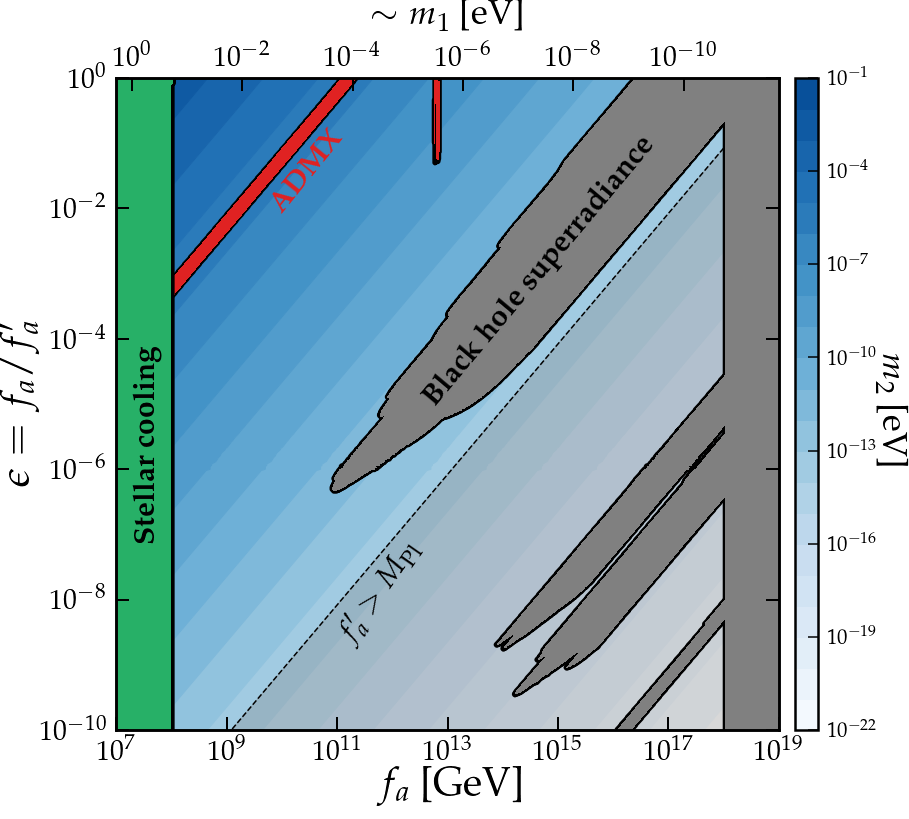

In [8]:
fig,ax1 = Plot_PQscales_OnePanel(fvals,epsvals,size_x=14.3,tfs=28,lfs=40)

ADMX_col = '#e02222'


# Plot m2
im1 = ax1.contourf(fvals,epsvals,m2,levels=10.0**arange(-22,0),cmap=thiscmap,zorder=-100,norm=colors.LogNorm())

# ADMX
PlotContour(ax1,f_halo,e_halo,ADMX,zorder=-1,alpha=1.0,lw=4,facecolor=ADMX_col,edgecolor='k',linestyle='-')
ax1.text(5e9,0.9e-2,r'{\bf ADMX}',color=ADMX_col,fontsize=30,rotation=51)

# Superradiance
PlotContour(ax1,f_sr,e_sr,SR,zorder=0.1,alpha=1.0,lw=5,facecolor='gray',edgecolor='k',linestyle='-')
ax1.text(3e12,1e-5,r'{\bf Black hole superradiance}',fontsize=30,color='k',rotation=50)

# Stellar cooling
StellarCooling(ax1,fvals,epsvals,text_pos=[2e7,1e-7])

# fp>Mpl
ax1.fill_between(fvals,fvals/1.2e19,y2=1e-99,alpha=0.3,color='gray',zorder=0)
ax1.plot(fvals,fvals/1.2e19,'k--',zorder=0)
ax1.text(1e11,0.2e-8,r'$f^\prime_a > M_{\rm Pl}$',rotation=55,fontsize=30)


# Colorbar
cb = fig.colorbar(im1,ax=ax1,pad=0.02,aspect=28)
cb.solids.set_edgecolor("face")
cb.ax.tick_params(which='major',length=10,width=1.5,direction='in',labelsize=21,pad=10)
for c in im1.collections: c.set_edgecolor("face")
plt.gcf().text(0.871,0.44,r'$m_2$ [eV]',color='w',rotation=-90,fontsize=35,ha='center')
plt.gcf().text(0.87,0.44,r'$m_2$ [eV]',rotation=-90,fontsize=35,ha='center')

ax1.set_xticks(10.0**arange(log10(fvals[0]),log10(fvals[-1])+1,2))

# Upper axis
ax2 = ax1.twiny()
ax2.set_xscale('log')
plt.gcf().text(0.5,0.93,'--',color='w')
ax2.set_xlabel('$\sim m_1$ [eV]',fontsize=35,labelpad=15)
ax2.set_xlim([m1[0,0],m1[0,-1]])
ax2.tick_params(direction='in',width=2,length=13)

ax1.set_ylabel(r'$\epsilon = f_a/f^\prime_a$',labelpad=-10)
MySaveFig(fig,'AxionMasses')

/Users/ciaranohare/Work/CompAxion/PlotFuncs.py:63: UserWarning: No contour levels were found within the data range.
  ax.contour(fvals,epsvals,con,levels=[0],linewidths=lw,colors=edgecolor,linestyles=linestyle,zorder=zorder)
/Users/ciaranohare/Work/CompAxion/AxionFuncs.py:56: RuntimeWarning: invalid value encountered in sqrt
  m2 = 1e9*sqrt(K_QCD/f**2*((N0+N1*eps**2)-(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5))


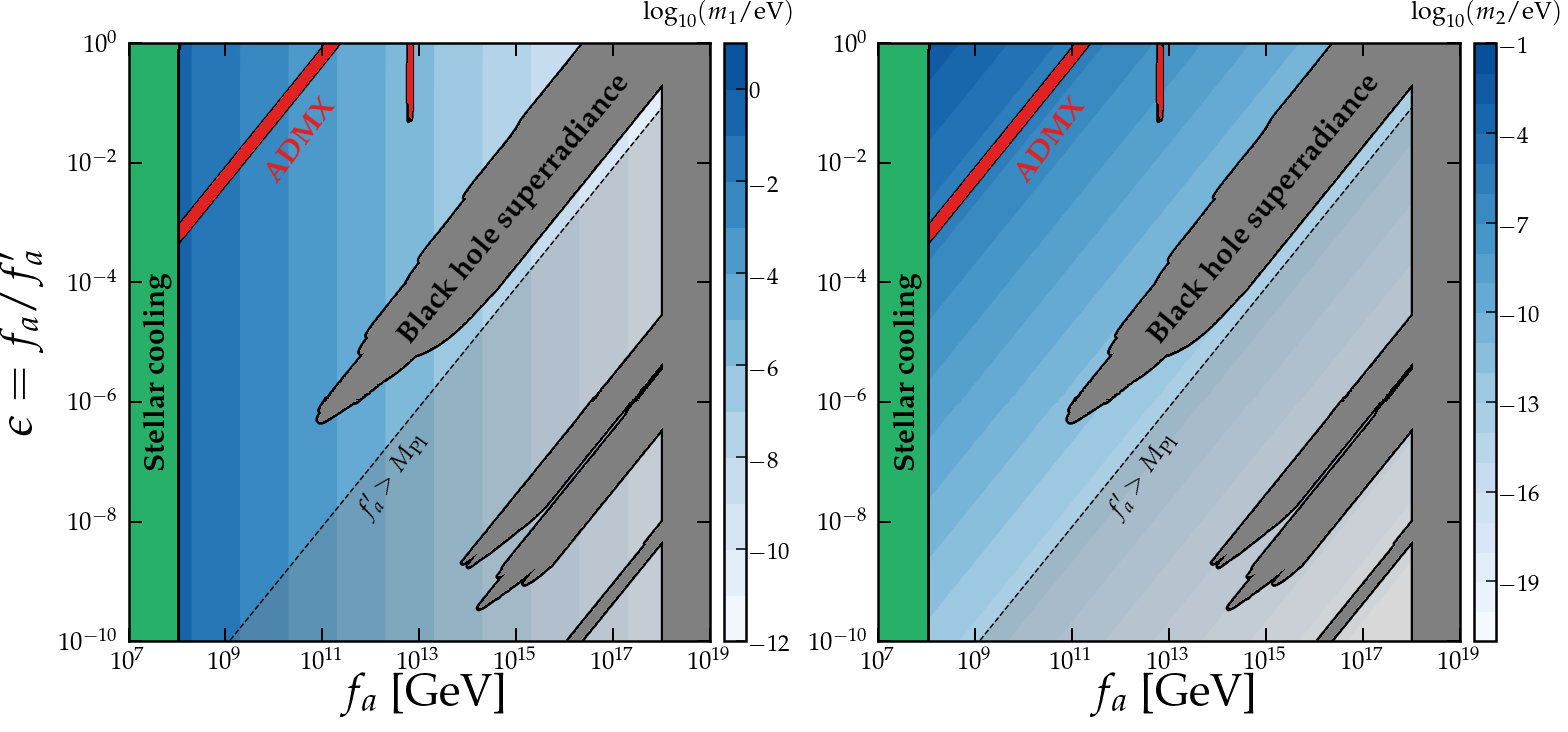

In [9]:
fig,ax1,ax2 = Plot_PQscales_TwoPanel(fvals,epsvals,wspace=0.07)

im1 = ax1.contourf(fvals,epsvals,log10(m1),levels=arange(-12,2),cmap=thiscmap,zorder=-100)
im2 = ax2.contourf(fvals,epsvals,log10(m2),levels=arange(-21,0),cmap=thiscmap,zorder=-100)


# ADMX
PlotContour(ax1,f_halo,e_halo,ADMX,zorder=-1,alpha=1.0,lw=3,facecolor=ADMX_col,edgecolor='k',linestyle='-')
ax1.text(5e9,0.5e-2,r'{\bf ADMX}',color=ADMX_col,fontsize=30,rotation=53)
PlotContour(ax2,f_halo,e_halo,ADMX,zorder=-1,alpha=1.0,lw=3,facecolor=ADMX_col,edgecolor='k',linestyle='-')
ax2.text(5e9,0.5e-2,r'{\bf ADMX}',color=ADMX_col,fontsize=30,rotation=53)

# Superradiance
PlotContour(ax1,f_sr,e_sr,SR,zorder=0.1,alpha=1.0,lw=5,facecolor='gray',edgecolor='k',linestyle='-')
ax1.text(3e12,1e-5,r'{\bf Black hole superradiance}',fontsize=30,color='k',rotation=50)
PlotContour(ax2,f_sr,e_sr,SR,zorder=0.1,alpha=1.0,lw=5,facecolor='gray',edgecolor='k',linestyle='-')
ax2.text(3e12,1e-5,r'{\bf Black hole superradiance}',fontsize=30,color='k',rotation=50)

# Stellar cooling
StellarCooling(ax1,fvals,epsvals,text_pos=[2e7,1e-7])
StellarCooling(ax2,fvals,epsvals,text_pos=[2e7,1e-7])

# fp>Mpl
ax1.fill_between(fvals,fvals/1.2e19,y2=1e-99,alpha=0.3,color='gray',zorder=0)
ax2.fill_between(fvals,fvals/1.2e19,y2=1e-99,alpha=0.3,color='gray',zorder=0)
ax1.plot(fvals,fvals/1.2e19,'k--',zorder=0)
ax2.plot(fvals,fvals/1.2e19,'k--',zorder=0)
ax1.text(5e11,1e-8,r'$f^\prime_a > M_{\rm Pl}$',rotation=55,fontsize=25)
ax2.text(5e11,1e-8,r'$f^\prime_a > M_{\rm Pl}$',rotation=55,fontsize=25)

# colorbar
cb1 = fig.colorbar(im1,ax=ax1,pad=0.02,aspect=28)
cb2 = fig.colorbar(im2,ax=ax2,pad=0.02,aspect=28)
for c in im1.collections: c.set_edgecolor("face")
for c in im2.collections: c.set_edgecolor("face")
cb1.solids.set_edgecolor("face")
cb1.ax.tick_params(which='major',length=10,width=1.5,direction='in',labelsize=23)
cb2.solids.set_edgecolor("face")
cb2.ax.tick_params(which='major',length=10,width=1.5,direction='in',labelsize=23)

plt.gcf().text(0.4,0.90,r'$\log_{10}(m_1/{\rm eV})$')
plt.gcf().text(0.81,0.90,r'$\log_{10}(m_2/{\rm eV})$')

MySaveFig(fig,'AxionMasses_TwoPanel')